In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#Loading the the dataset onto a dataframe we named as df using pandas
df = pd.read_csv("C:/Users/Mitali/Desktop/Study/Data Intensive Computing/Project/Banking Dataset - Marketing Targets/Dataset/Bank data.csv", sep = ";")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
#This code block checks for null values if present in any column and then outputs the total count of null values in 
#that column
# This shows that our dataset has no null values present
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
#This code block is used to find the number of duplicated values present if any in the dataset.
#The output false just proves that there are no duplicated values in the dataset.
df.duplicated().value_counts()

False    45211
dtype: int64

In [6]:
#Here, we try to understand the number of column, their count type as well as the data type of these columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
#The columns which have object datatype are our categorical columns and we need to know the knid of 
#unique values they possess.

In [8]:
df.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [9]:
df.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [10]:


df.education.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [11]:
df.default.unique()

array(['no', 'yes'], dtype=object)

In [12]:
df.housing.unique()

array(['yes', 'no'], dtype=object)

In [13]:
df.loan.unique()

array(['no', 'yes'], dtype=object)

In [14]:
df.contact.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [15]:
df.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [16]:
df.poutcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [17]:
df.y.unique()

array(['no', 'yes'], dtype=object)

In [18]:
#Certain Column names need to be changed as they are not indicative of the features they are representing correctly.
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [19]:
df.rename(columns = {'age':'Age', 'job':'Profession', 'marital': 'Marital_Status', 'default': 'Default_Credit', 'balance':'Annual_Bankbal',
                    'housing': 'Housing_Loan', 'loan':'Private_Loan', 'contact':'Contact_Medium', 'pdays':'Previous_Idledays', 
                    'previous':'Prior_Contact_ct', 'poutcome':'Prior_Outcome', 'y':'Latest_Outcome', 'duration':'Call_Duration', 
                    'month':'Prior_Contact_Mos', 'day':'Last_Contact_Day'}, inplace = True)

df.head()

,Age,Profession,Marital_Status,education,Default_Credit,Annual_Bankbal,Housing_Loan,Private_Loan,Contact_Medium,Last_Contact_Day,Prior_Contact_Mos,Call_Duration,campaign,Previous_Idledays,Prior_Contact_ct,Prior_Outcome,Latest_Outcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [20]:
#We use this code block to better understand the numerical features of the dataset.
df.describe()

,Age,Annual_Bankbal,Last_Contact_Day,Call_Duration,campaign,Previous_Idledays,Prior_Contact_ct
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [21]:
#The 'unknown' values in Profession,education,Contact_Medium could be replaced with 'other' so the ambiguity of this value is resolved

In [22]:
df[['Profession','education','Contact_Medium']] = df[['Profession','education','Contact_Medium']].replace(['unknown'],'other')

In [23]:
df.head()

,Age,Profession,Marital_Status,education,Default_Credit,Annual_Bankbal,Housing_Loan,Private_Loan,Contact_Medium,Last_Contact_Day,Prior_Contact_Mos,Call_Duration,campaign,Previous_Idledays,Prior_Contact_ct,Prior_Outcome,Latest_Outcome
0,58,management,married,tertiary,no,2143,yes,no,other,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,other,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,other,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,other,no,1506,yes,no,other,5,may,92,1,-1,0,unknown,no
4,33,other,single,other,no,1,no,no,other,5,may,198,1,-1,0,unknown,no


In [24]:
#We convert the latest_outcome values from yes, no to binary values 0,1 for easier analysis
df['Latest_Outcome'] = df['Latest_Outcome'].apply(lambda a:0 if a=='no' else 1)

In [25]:
df.head()

,Age,Profession,Marital_Status,education,Default_Credit,Annual_Bankbal,Housing_Loan,Private_Loan,Contact_Medium,Last_Contact_Day,Prior_Contact_Mos,Call_Duration,campaign,Previous_Idledays,Prior_Contact_ct,Prior_Outcome,Latest_Outcome
0,58,management,married,tertiary,no,2143,yes,no,other,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,other,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,other,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,other,no,1506,yes,no,other,5,may,92,1,-1,0,unknown,0
4,33,other,single,other,no,1,no,no,other,5,may,198,1,-1,0,unknown,0


In [26]:
#We can also convert the months in categorical order to numerical order for easier analyses.

df['Prior_Contact_Mos'].replace(['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'],
                                [1,2,3,4,5,6,7,8,9,10,11,12], inplace = True)

In [27]:
df.head()

,Age,Profession,Marital_Status,education,Default_Credit,Annual_Bankbal,Housing_Loan,Private_Loan,Contact_Medium,Last_Contact_Day,Prior_Contact_Mos,Call_Duration,campaign,Previous_Idledays,Prior_Contact_ct,Prior_Outcome,Latest_Outcome
0,58,management,married,tertiary,no,2143,yes,no,other,5,5,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,other,5,5,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,other,5,5,76,1,-1,0,unknown,0
3,47,blue-collar,married,other,no,1506,yes,no,other,5,5,92,1,-1,0,unknown,0
4,33,other,single,other,no,1,no,no,other,5,5,198,1,-1,0,unknown,0


In [28]:
df.info()
#The datat type for Previous_Contact_Mos has now changed to int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                45211 non-null  int64 
 1   Profession         45211 non-null  object
 2   Marital_Status     45211 non-null  object
 3   education          45211 non-null  object
 4   Default_Credit     45211 non-null  object
 5   Annual_Bankbal     45211 non-null  int64 
 6   Housing_Loan       45211 non-null  object
 7   Private_Loan       45211 non-null  object
 8   Contact_Medium     45211 non-null  object
 9   Last_Contact_Day   45211 non-null  int64 
 10  Prior_Contact_Mos  45211 non-null  int64 
 11  Call_Duration      45211 non-null  int64 
 12  campaign           45211 non-null  int64 
 13  Previous_Idledays  45211 non-null  int64 
 14  Prior_Contact_ct   45211 non-null  int64 
 15  Prior_Outcome      45211 non-null  object
 16  Latest_Outcome     45211 non-null  int64

<AxesSubplot:>

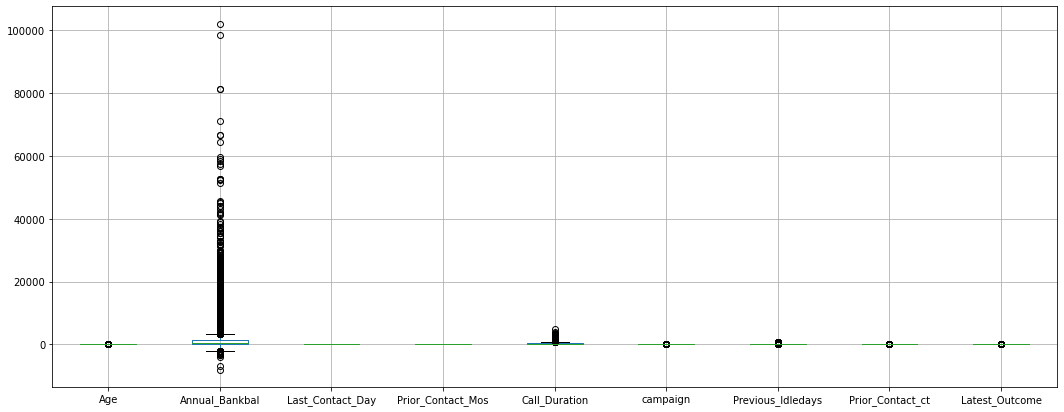

In [29]:
#Outlier Detection
df.boxplot(figsize=(18,7))

In [30]:
#From here we can infer that Annual_bankbal has outliers present in it.
#We used the method of zscore to detect the arrays which have outliers in Annual_Bankbal
#Explain the theory behind z-score a bit in the report from google(could refer to geeksfromgeeks)
from scipy import stats
z = np.abs(stats.zscore(df['Annual_Bankbal']))
print(z)

0        0.256419
1        0.437895
2        0.446762
3        0.047205
4        0.447091
           ...   
45206    0.176460
45207    0.120447
45208    1.429593
45209    0.228024
45210    0.528364
Name: Annual_Bankbal, Length: 45211, dtype: float64


In [31]:
print((np.where(z > 3)))

(array([   34,    69,   334,   446,   920,  2065,  2343,  2479,  2554,
        2576,  2618,  2619,  2778,  2852,  2899,  2931,  2938,  3012,
        3024,  3099,  3197,  3327,  3500,  3806,  3851,  4025,  4081,
        4135,  4150,  4483,  4583,  4625,  4846,  4851,  4954,  4958,
        4965,  4975,  5007,  5133,  5249,  5279,  5302,  5306,  5309,
        5464,  5613,  5725,  5937,  6342,  6429,  6431,  6529,  6619,
        6779,  6825,  6876,  7014,  7079,  7156,  7169,  7198,  7200,
        7229,  7334,  7362,  7534,  7563,  7627,  7674,  7681,  7743,
        7782,  7822,  7865,  7991,  8008,  8184,  8196,  8244,  8335,
        8349,  8377,  8433,  8472,  8479,  8534,  8555,  8588,  8634,
        8700,  8724,  8828,  8854,  9047,  9068,  9079,  9117,  9162,
        9178,  9239,  9312,  9421,  9425,  9461,  9472,  9536,  9552,
        9564,  9576,  9598,  9625,  9778,  9793,  9803,  9809,  9822,
        9895,  9933, 10038, 10059, 10061, 10062, 10107, 10173, 10180,
       10260, 10262

In [32]:
#EDA

<AxesSubplot:xlabel='Age', ylabel='Annual_Bankbal'>

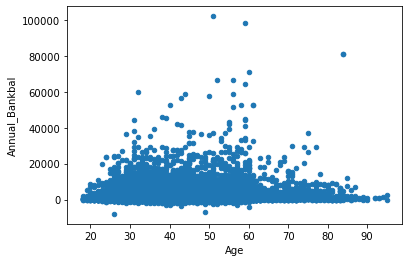

In [33]:
df.plot.scatter(x='Age', y='Annual_Bankbal')

<AxesSubplot:>

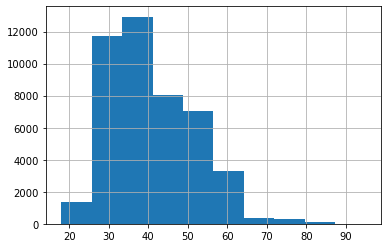

In [34]:
df["Age"].hist()

C:\Users\Mitali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Profession', ylabel='count'>

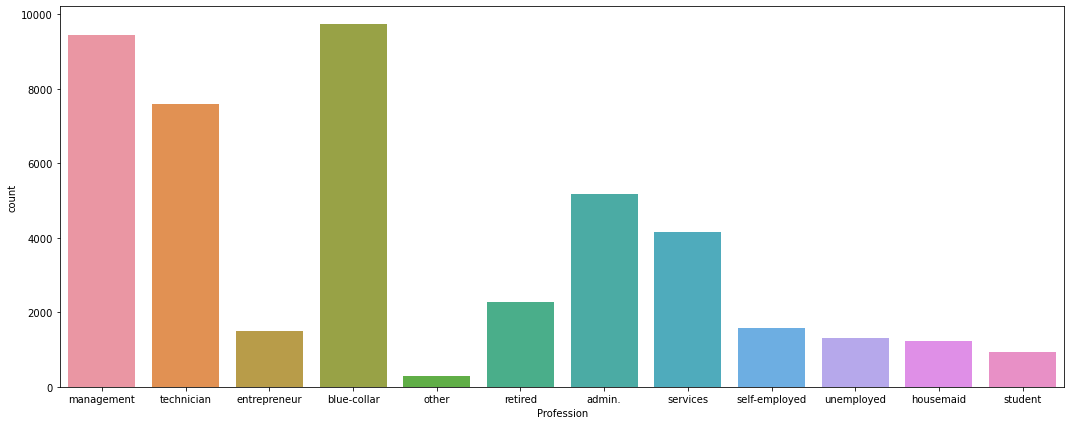

In [35]:
plt.figure(figsize = (18,7))
sns.countplot(df["Profession"])

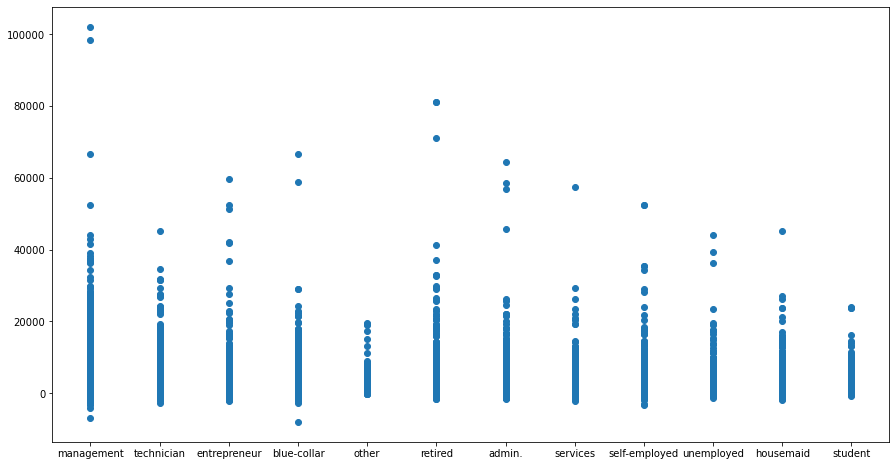

In [36]:

plt.figure(figsize=(15,8))
plt.scatter(df.Profession,df.Annual_Bankbal)
plt.show()

In [37]:
df.corr()

,Age,Annual_Bankbal,Last_Contact_Day,Prior_Contact_Mos,Call_Duration,campaign,Previous_Idledays,Prior_Contact_ct,Latest_Outcome
Age,1.000000,0.097783,-0.009120,0.092903,-0.004648,0.004760,-0.023758,0.001288,0.025155
Annual_Bankbal,0.097783,1.000000,0.004503,0.094605,0.021560,-0.014578,0.003435,0.016674,0.052838
Last_Contact_Day,-0.009120,0.004503,1.000000,0.101989,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
Prior_Contact_Mos,0.092903,0.094605,0.101989,1.000000,-0.011866,0.054868,-0.108940,-0.035600,0.018717
Call_Duration,-0.004648,0.021560,-0.030206,-0.011866,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,-0.014578,0.162490,0.054868,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
Previous_Idledays,-0.023758,0.003435,-0.093044,-0.108940,-0.001565,-0.088628,1.000000,0.454820,0.103621
Prior_Contact_ct,0.001288,0.016674,-0.051710,-0.035600,0.001203,-0.032855,0.454820,1.000000,0.093236
Latest_Outcome,0.025155,0.052838,-0.028348,0.018717,0.394521,-0.073172,0.103621,0.093236,1.000000


<AxesSubplot:>

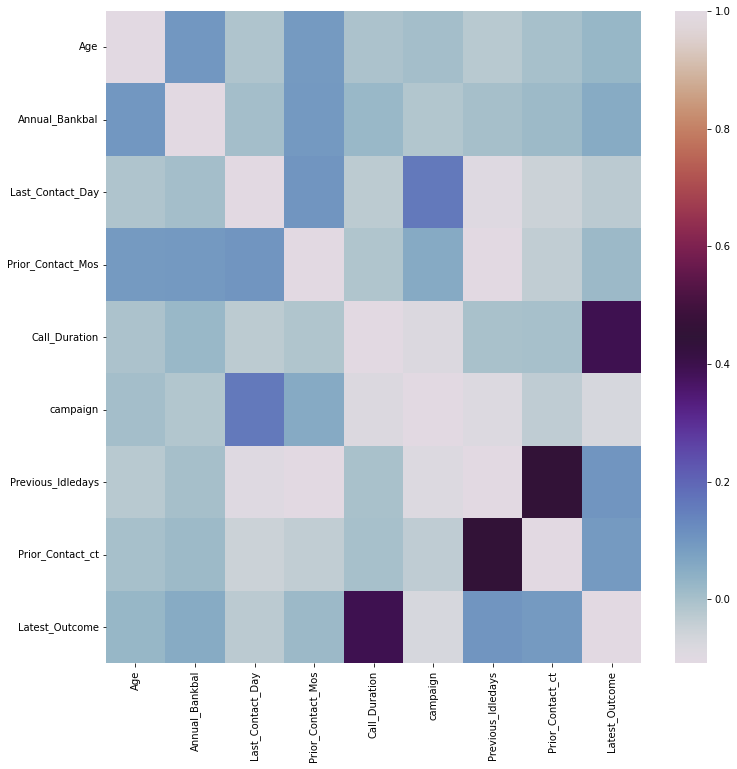

In [38]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), cmap = "twilight")

In [39]:
df[['Age','Call_Duration','Annual_Bankbal']].corr()

,Age,Call_Duration,Annual_Bankbal
Age,1.000000,-0.004648,0.097783
Call_Duration,-0.004648,1.000000,0.021560
Annual_Bankbal,0.097783,0.021560,1.000000


<AxesSubplot:>

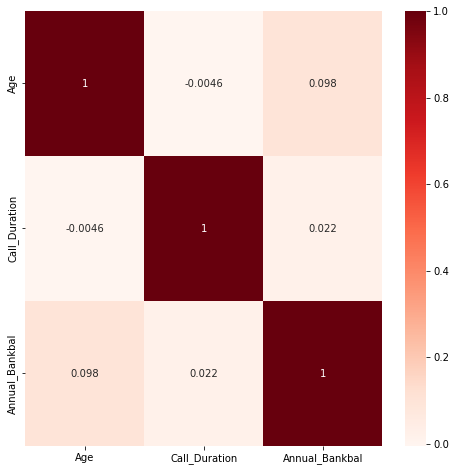

In [40]:
plt.figure(figsize = (8,8))
sns.heatmap(df[['Age','Call_Duration','Annual_Bankbal']].corr(), annot=True, cmap = 'Reds')

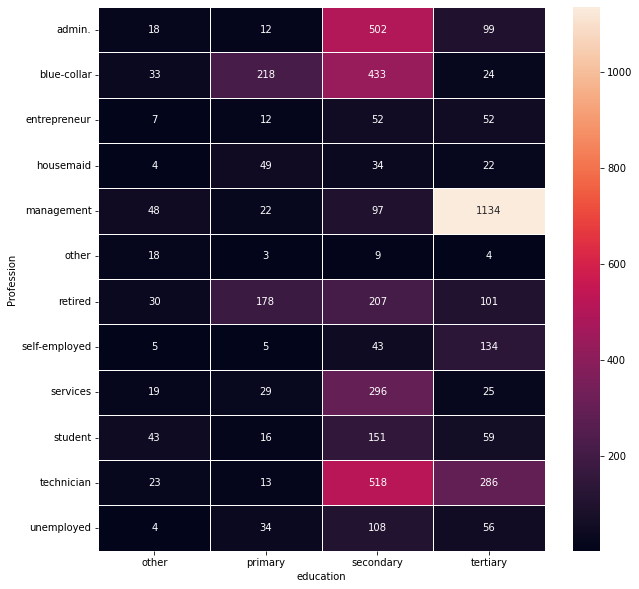

In [41]:
plt.figure(figsize = (10,10))
Ed_Prof = (df.pivot_table(index="Profession", columns="education", values="Latest_Outcome", aggfunc=sum))
sns.heatmap(Ed_Prof, annot=True, fmt="d", linewidths=0.5);

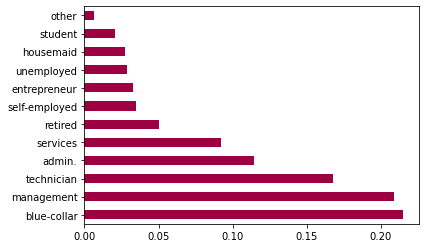

In [42]:
df.Profession.value_counts(normalize=True).plot.barh(cmap = "Spectral")
plt.show()

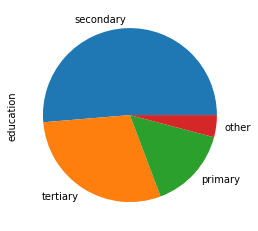

In [43]:
df.education.value_counts(normalize=True).plot.pie()
plt.show()

C:\Users\Mitali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


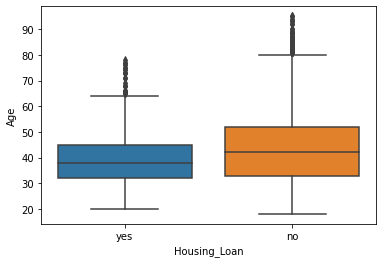

In [44]:
sns.boxplot(df.Housing_Loan, df.Age)
plt.show()

In [45]:
#sns.pairplot(data = df, vars = ['Age','Annual_Bankbal','Call_Duration', 'Prior_Contact_ct', 'Previous_Idledays', 'Latest_Outcome'], 
            #hue = 'Latest_Outcome')
               

In [46]:
#MODEL SELECTION

In [47]:
df.head()

,Age,Profession,Marital_Status,education,Default_Credit,Annual_Bankbal,Housing_Loan,Private_Loan,Contact_Medium,Last_Contact_Day,Prior_Contact_Mos,Call_Duration,campaign,Previous_Idledays,Prior_Contact_ct,Prior_Outcome,Latest_Outcome
0,58,management,married,tertiary,no,2143,yes,no,other,5,5,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,other,5,5,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,other,5,5,76,1,-1,0,unknown,0
3,47,blue-collar,married,other,no,1506,yes,no,other,5,5,92,1,-1,0,unknown,0
4,33,other,single,other,no,1,no,no,other,5,5,198,1,-1,0,unknown,0


In [48]:
df_obj = df.select_dtypes('object')
df_obj.columns

Index(['Profession', 'Marital_Status', 'education', 'Default_Credit',
       'Housing_Loan', 'Private_Loan', 'Contact_Medium', 'Prior_Outcome'],
      dtype='object')

In [49]:
#Label Encoding for categorical columns
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Profession'] = le.fit_transform(df['Profession'])
df['Marital_Status'] = le.fit_transform(df['Marital_Status'])
df['education'] = le.fit_transform(df['education'])
df['Default_Credit'] = le.fit_transform(df['Default_Credit'])
df['Housing_Loan'] = le.fit_transform(df['Housing_Loan'])
df['Private_Loan'] = le.fit_transform(df['Private_Loan'])
df['Contact_Medium'] = le.fit_transform(df['Contact_Medium'])
df['Prior_Outcome'] = le.fit_transform(df['Prior_Outcome'])


In [50]:
df.head()

,Age,Profession,Marital_Status,education,Default_Credit,Annual_Bankbal,Housing_Loan,Private_Loan,Contact_Medium,Last_Contact_Day,Prior_Contact_Mos,Call_Duration,campaign,Previous_Idledays,Prior_Contact_ct,Prior_Outcome,Latest_Outcome
0,58,4,1,3,0,2143,1,0,1,5,5,261,1,-1,0,3,0
1,44,10,2,2,0,29,1,0,1,5,5,151,1,-1,0,3,0
2,33,2,1,2,0,2,1,1,1,5,5,76,1,-1,0,3,0
3,47,1,1,0,0,1506,1,0,1,5,5,92,1,-1,0,3,0
4,33,5,2,0,0,1,0,0,1,5,5,198,1,-1,0,3,0


In [51]:
X = df.drop(['Latest_Outcome'], axis = 1)
y = df['Latest_Outcome']

In [52]:
X.head()

,Age,Profession,Marital_Status,education,Default_Credit,Annual_Bankbal,Housing_Loan,Private_Loan,Contact_Medium,Last_Contact_Day,Prior_Contact_Mos,Call_Duration,campaign,Previous_Idledays,Prior_Contact_ct,Prior_Outcome
0,58,4,1,3,0,2143,1,0,1,5,5,261,1,-1,0,3
1,44,10,2,2,0,29,1,0,1,5,5,151,1,-1,0,3
2,33,2,1,2,0,2,1,1,1,5,5,76,1,-1,0,3
3,47,1,1,0,0,1506,1,0,1,5,5,92,1,-1,0,3
4,33,5,2,0,0,1,0,0,1,5,5,198,1,-1,0,3


In [53]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Latest_Outcome, dtype: int64

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 12)

In [55]:
cl = X_train.columns

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
X_train = pd.DataFrame(X_train, columns=[cl])
X_test = pd.DataFrame(X_test, columns=[cl])

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [59]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [60]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

In [61]:
#SVM
svm_mod = SVC()
svm_mod.fit(X_train,y_train)
y_pred=svm_mod.predict(X_test)

C:\Users\Mitali\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Mitali\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [62]:
#Accuracy for SVM
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8979


In [63]:
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[9790  204]
 [ 950  359]]

True Positives(TP) =  9790

True Negatives(TN) =  359

False Positives(FP) =  204

False Negatives(FN) =  950


<AxesSubplot:>

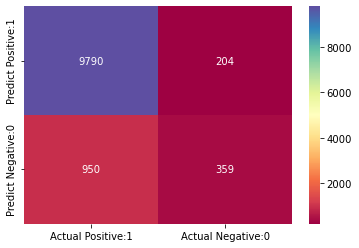

In [64]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Spectral')

In [65]:
#Classification report for SVM
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      9994
           1       0.64      0.27      0.38      1309

    accuracy                           0.90     11303
   macro avg       0.77      0.63      0.66     11303
weighted avg       0.88      0.90      0.88     11303



C:\Users\Mitali\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


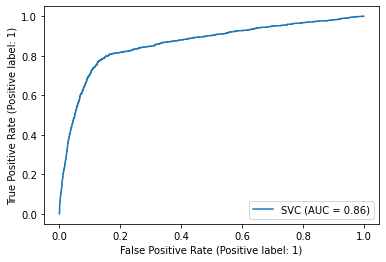

In [66]:
#ROC Curve for SVM
RocCurveDisplay.from_estimator(svm_mod, X_test, y_test)

In [67]:
#KNN
kn = KNeighborsClassifier()
kn.fit(X_train, y_train)
y_predk = kn.predict(X_test)

C:\Users\Mitali\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Mitali\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [68]:
#Accuracy for KNN
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_predk)))

Model accuracy score: 0.8951


In [69]:
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predk)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[9658  336]
 [ 850  459]]

True Positives(TP) =  9658

True Negatives(TN) =  459

False Positives(FP) =  336

False Negatives(FN) =  850


<AxesSubplot:>

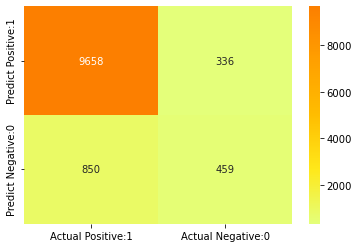

In [70]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Wistia')

In [71]:
#Classification report for KNN
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predk))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      9994
           1       0.58      0.35      0.44      1309

    accuracy                           0.90     11303
   macro avg       0.75      0.66      0.69     11303
weighted avg       0.88      0.90      0.88     11303



C:\Users\Mitali\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


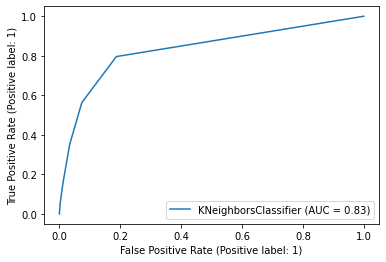

In [72]:
#ROC Curve for KNN
RocCurveDisplay.from_estimator(kn, X_test, y_test)

In [73]:
#Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_predt = dt.predict(X_test)

C:\Users\Mitali\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Mitali\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [74]:
#Accuracy for Decision Tree
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_predt)))

Model accuracy score: 0.8804


In [75]:
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predt)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[9295  699]
 [ 653  656]]

True Positives(TP) =  9295

True Negatives(TN) =  656

False Positives(FP) =  699

False Negatives(FN) =  653


<AxesSubplot:>

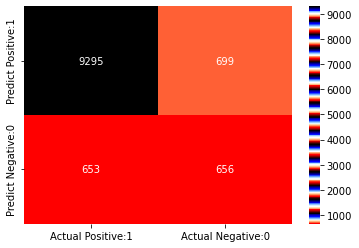

In [76]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='flag')

In [77]:
#Classification report for Decision Tree
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predt))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      9994
           1       0.48      0.50      0.49      1309

    accuracy                           0.88     11303
   macro avg       0.71      0.72      0.71     11303
weighted avg       0.88      0.88      0.88     11303



C:\Users\Mitali\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


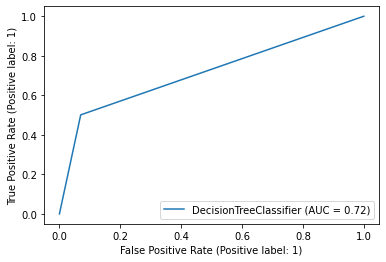

In [78]:
#ROC Curve for Decision Tree
RocCurveDisplay.from_estimator(dt, X_test, y_test)

In [79]:
#RANDOM FOREST
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_predr = rf.predict(X_test)

C:\Users\Mitali\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Mitali\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [80]:
#Accuracy for Random Forest
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_predr)))

Model accuracy score: 0.9042


In [81]:
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predr)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[9697  297]
 [ 786  523]]

True Positives(TP) =  9697

True Negatives(TN) =  523

False Positives(FP) =  297

False Negatives(FN) =  786


<AxesSubplot:>

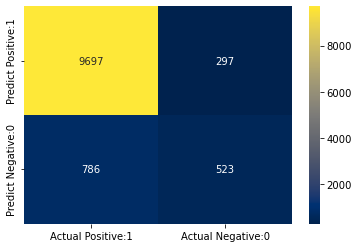

In [82]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='cividis')

In [83]:
#Classification report for Random Forest
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predr))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      9994
           1       0.64      0.40      0.49      1309

    accuracy                           0.90     11303
   macro avg       0.78      0.68      0.72     11303
weighted avg       0.89      0.90      0.89     11303



C:\Users\Mitali\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


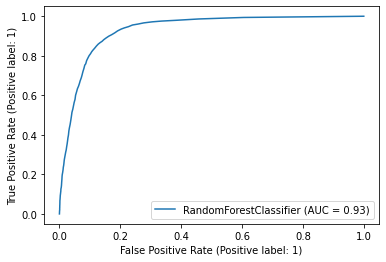

In [84]:
#ROC Curve for Random Forest
RocCurveDisplay.from_estimator(rf, X_test, y_test)

In [85]:
#LOGISTIC REGRESSION
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
y_predl = lr.predict(X_test)

C:\Users\Mitali\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Mitali\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [86]:
#Accuracy for Logistic Regression
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_predl)))

Model accuracy score: 0.8935


In [87]:
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predl)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[9809  185]
 [1019  290]]

True Positives(TP) =  9809

True Negatives(TN) =  290

False Positives(FP) =  185

False Negatives(FN) =  1019


<AxesSubplot:>

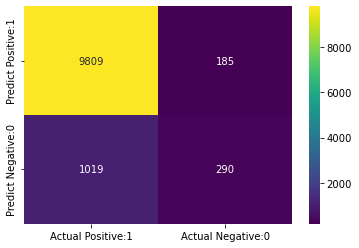

In [88]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='viridis')

In [89]:
#Classification report for Logistic Regression
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predl))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      9994
           1       0.61      0.22      0.33      1309

    accuracy                           0.89     11303
   macro avg       0.76      0.60      0.63     11303
weighted avg       0.87      0.89      0.87     11303



C:\Users\Mitali\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


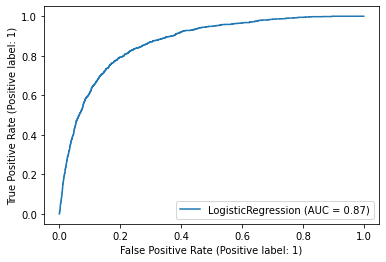

In [90]:
#ROC Curve for Logistic Regression 
RocCurveDisplay.from_estimator(lr, X_test, y_test)

In [91]:
#GaussianNb
gn = GaussianNB()
gn.fit(X_train, y_train)
y_predg = gn.predict(X_test)

C:\Users\Mitali\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Mitali\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [92]:
#GaussianNb Accuracy
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_predg)))

Model accuracy score: 0.8406


In [93]:
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predg)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[8886 1108]
 [ 694  615]]

True Positives(TP) =  8886

True Negatives(TN) =  615

False Positives(FP) =  1108

False Negatives(FN) =  694


<AxesSubplot:>

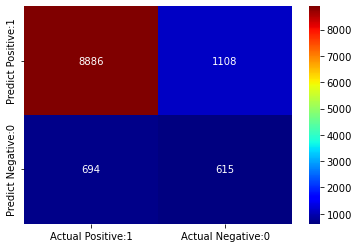

In [94]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='jet')

In [95]:
#Classification report for GaussianNB
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predg))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      9994
           1       0.36      0.47      0.41      1309

    accuracy                           0.84     11303
   macro avg       0.64      0.68      0.66     11303
weighted avg       0.86      0.84      0.85     11303



C:\Users\Mitali\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


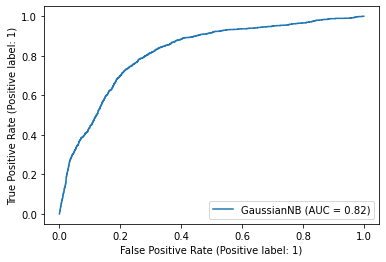

In [96]:
#ROC Curve for GaussianNB 
RocCurveDisplay.from_estimator(gn, X_test, y_test)

In [97]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_predb = gbc.predict(X_test)

C:\Users\Mitali\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Mitali\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [98]:
#Accuracy for Gradient Boosting
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_predb)))

Model accuracy score: 0.9068


In [99]:
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predb)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[9724  270]
 [ 784  525]]

True Positives(TP) =  9724

True Negatives(TN) =  525

False Positives(FP) =  270

False Negatives(FN) =  784


<AxesSubplot:>

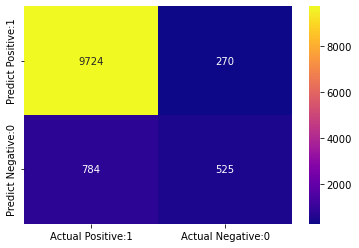

In [100]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='plasma')

In [101]:
#Classification report for Gradient Boosting
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predb))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      9994
           1       0.66      0.40      0.50      1309

    accuracy                           0.91     11303
   macro avg       0.79      0.69      0.72     11303
weighted avg       0.89      0.91      0.90     11303



C:\Users\Mitali\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


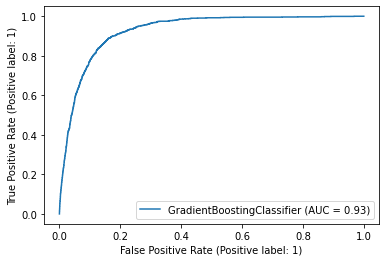

In [102]:
#ROC curve for Gradient Boosting 
RocCurveDisplay.from_estimator(gbc, X_test, y_test)